In [1]:
'''
Author: daniel
Date: 2023-02-20 20:23:29
LastEditTime: 2023-02-20 20:27:07
LastEditors: daniel
Description: 
FilePath: /Cerberus-main/jupyters/nyud3.ipynb
have a nice day
'''

# !pip install ipykernel

import os 
os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
import matplotlib.pyplot as plt
import numpy as np 
import cv2
import torchvision.transforms as transforms
from utils import  * 
from PIL import Image
import math
from os.path import split,join,exists
#* initial
# plt.rcParams['figure.figsize'] = (8.0, 2.0) # 设置figure_size尺寸
# plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style
# plt.rcParams['image.cmap'] = 'gray' # 设置 颜色 style
plt.rcParams['savefig.dpi'] = 300 #图片像素
plt.rcParams['figure.dpi'] = 300 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400





Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

In [5]:
path = '/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/plot'
eval_dirs=[join(path,x) for x in os.listdir(path) if x.startswith('eval_')]


## change the 'RINDNet-ResNet50' to 'RINDNet'

In [1]:

import glob 
import sys
def cp_file():
    for d in eval_dirs:
        need_to_change_files = glob.glob(join(d,"RINDNet-ResNet50*"))


        for f in need_to_change_files:    
            # print(f,f.replace('-ResNet50',''))
            
            command = f"cp {f} {f.replace('-ResNet50','')}"
            print(command)

            os.system(command)

        

    


## plot NYUDv2  normal and depth edge  

In [3]:
from dataloaders.datasets.nyud3 import Nyud3

datasets = Nyud3()

100%|██████████| 654/654 [18:21<00:00,  1.68s/it]


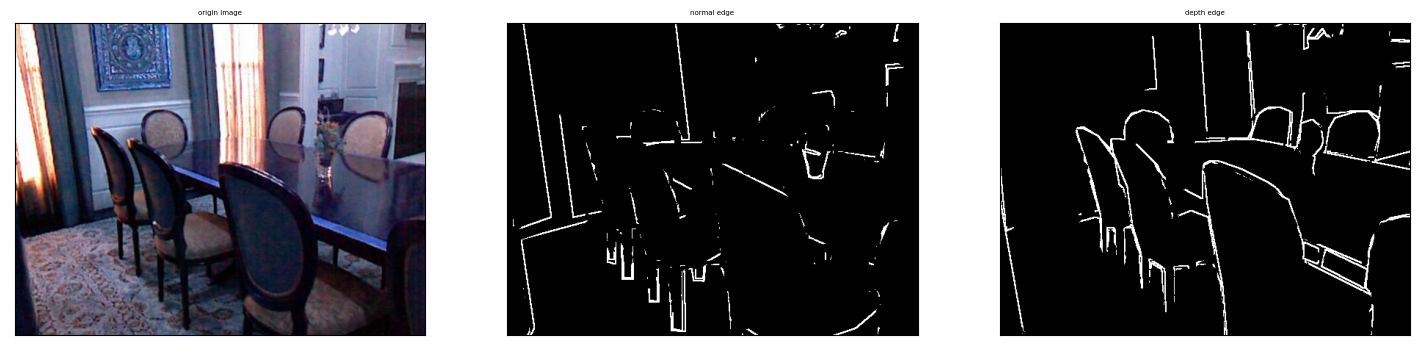

In [4]:
from tqdm import tqdm
def resize(img):
    return img[45:471, 41:601] #* (426,560)

save_dir = 'logs/nyudv2_egde_qualitative_results'

make_dir(save_dir)
plt.rcParams['figure.figsize'] = ( 18.0,5.0) # 设置figure_size尺寸
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率

for idx in tqdm(range(datasets.__len__())):
    image,label,edge,depth_map,depth_edge,normal_map,normal_edge,name =datasets.getitem_all(idx)
    save_path = join(save_dir,name)
    if not exists(save_path):
        show_imgs([resize(image),resize(normal_edge),resize(depth_edge)],[0,1,1],['origin image','normal edge','depth edge'],img_name=save_path)
        
    

In [ ]:


all_names = [x for x in os.listdir(save_dir) if x.endswith('png')]


num_imgs = len(all_names)

num_imgs//5



# for name in all_names:
#     a = imread(join(save_dir,name))

    

